## 3rd Project | Machine Learning

###  Instructions

* Follow a Python Project structure.
* Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
* The **ML models** that we'll be using are **Logistic Regression, Support Vector Machine & XGBoost**.
* Define the **independent** and **dependent** variables to train the models, remember that you can add any technical indicator to your dataset.
* Split the `train` datasets into train/test.
* Our dependent variable should be a category that we want to predict, i.e. "Buy" and "Not buy", or "Sell" and "Not sell" for the short models, we can construct it if the next k price is over / under a certain threshold.
* For each model, fine tune all hyperparameters worth moving, then you can easily generate the True / False signals to backtest.
* Be careful when selecting a metric to fine-tune.
* For each dataset train/test pair (1d, 1h, 5m, 1m):

    * Use the buy/sell signals from the predictions.
    * Create all possible combinations of all machine learning models (2^n - 1, 7...).
    * Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    * Optimize the backtest parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    * Select the optimal strategy and describe it thoroughly (X, y variables used, a brief description of the ML models, results).
    * Now, use the optimal strategy with the test dataset and compare it to a passive strategy.

-------

In [1]:
from technical_analysis import Operation, TradingStrategy, MLModels

In [2]:
strategy = TradingStrategy('5m')

In [3]:
strategy.prepare_data_for_log_model()

In [6]:
strategy.optimize_and_fit_models()

[I 2024-03-10 11:57:02,110] A new study created in memory with name: no-name-694e174b-d42e-46c0-bb3e-f82fbfa24717
[I 2024-03-10 11:57:35,256] Trial 0 finished with value: 0.291354663036079 and parameters: {'C': 0.22383039735068544, 'l1_ratio': 0.7514344051788855, 'fit_intercept': True}. Best is trial 0 with value: 0.291354663036079.
[I 2024-03-10 11:58:06,146] Trial 1 finished with value: 0.29104477611940294 and parameters: {'C': 18391.57026225853, 'l1_ratio': 0.32814846249829066, 'fit_intercept': False}. Best is trial 0 with value: 0.291354663036079.
[I 2024-03-10 11:58:38,353] Trial 2 finished with value: 0.29130508762974305 and parameters: {'C': 0.02069513402616705, 'l1_ratio': 0.454022179782985, 'fit_intercept': True}. Best is trial 0 with value: 0.291354663036079.
[I 2024-03-10 11:59:11,180] A new study created in memory with name: no-name-36fb9b74-f9b5-48d8-8ca9-d8429e29ed9e
[I 2024-03-10 11:59:44,484] Trial 0 finished with value: 0.29780033840947545 and parameters: {'C': 1189.52

In [8]:
strategy.data.columns

Index(['Unnamed: 0', 'Timestamp', 'Gmtoffset', 'Datetime', 'Open', 'High',
       'Low', 'Close', 'Volume', 'Returns', 'Volatility', 'Close_Trend',
       'Volume_Trend', 'Spread', 'Future_Return_Avg_5', 'LR_Buy_Signal',
       'LR_Sell_Signal', 'Pt-1', 'Pt-2', 'Pt-3', 'Logistic_Buy_Signal',
       'Logistic_Sell_Signal'],
      dtype='object')

---

## <font color='navy'>  Order 1 <font color='black'> 

In this section, we'll demonstrate a practical example using a 5-minute time frame. Here's how we'll proceed:
    
* Initialize by declaring the chosen time frame.
* Test all combinations.
* Plot the result of the best one.
* Optimize the parameters of the best indicators, as well as the take_profit, stop_loss, and number of shares.
* Plot the results of the best optimized combination.
* Plot the best optimized combination on test data with the same time frame.

### <font color='navy'>  Run all combinations <font color='black'> 

In [1]:
from technical_analysis import Operation, TradingStrategy
strategy = TradingStrategy('5m')
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['RSI']
Ejecutando con combinación de indicadores: ['SMA']
Ejecutando con combinación de indicadores: ['MACD']
Ejecutando con combinación de indicadores: ['SAR']
Ejecutando con combinación de indicadores: ['ADX']
Ejecutando con combinación de indicadores: ['Stoch']
Ejecutando con combinación de indicadores: ['RSI', 'SMA']
Ejecutando con combinación de indicadores: ['RSI', 'MACD']
Ejecutando con combinación de indicadores: ['RSI', 'SAR']
Ejecutando con combinación de indicadores: ['RSI', 'ADX']
Ejecutando con combinación de indicadores: ['RSI', 'Stoch']
Ejecutando con combinación de indicadores: ['SMA', 'MACD']
Ejecutando con combinación de indicadores: ['SMA', 'SAR']
Ejecutando con combinación de indicadores: ['SMA', 'ADX']
Ejecutando con combinación de indicadores: ['SMA', 'Stoch']
Ejecutando con combinación de indicadores: ['MACD', 'SAR']
Ejecutando con combinación de indicadores: ['MACD', 'ADX']
Ejecutando con combinación de indicadores: ['

For this timeframe, the best combination is: 'SAR' and 'ADX'. 

### <font color='navy'>  Backtesting of the best combination <font color='black'> 

Here we test a trading strategy on historical data to determine its potential for future success. It allows traders to simulate a strategy's performance without risking actual capital, providing insights into the strategy's risk and profitability before live implementation.

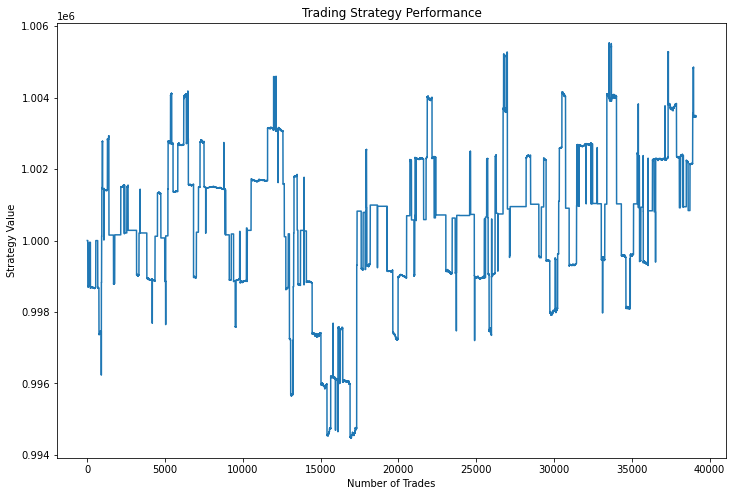

In [2]:
strategy.plot_results(best = True)

### <font color='navy'>  Best model without optimization on test <font color='black'> 

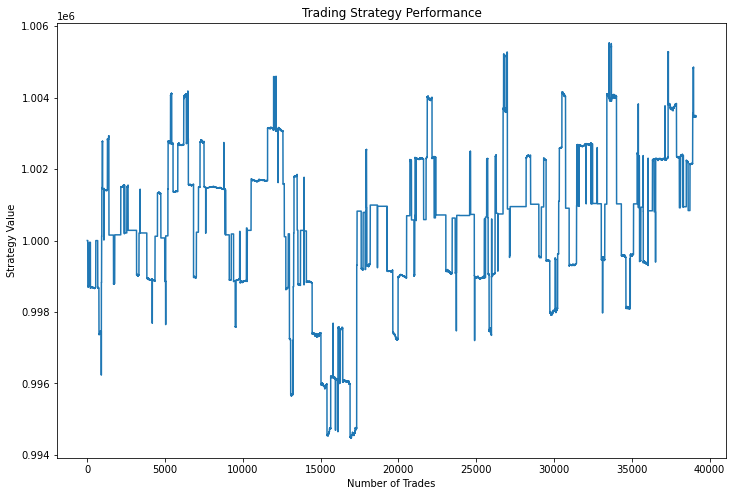

In [3]:
strategy.test()

In [4]:
strategy.strategy_value[-1]

1003456.5500030748

### <font color='navy'>  Parameters Optimization <font color='black'> 

In [5]:
strategy.optimize_parameters()

[I 2024-02-25 18:02:37,586] A new study created in memory with name: no-name-449bac46-bf53-47ed-a17c-dfb0375c1e28
[I 2024-02-25 18:03:42,527] Trial 0 finished with value: 1005568.8076578247 and parameters: {'sar_step': 0.022677838882670907, 'sar_max_step': 0.31816400872081735, 'adx_window': 14, 'take_profit': 1.1771700413921955, 'stop_loss': 0.9738732727166926, 'n_shares': 20}. Best is trial 0 with value: 1005568.8076578247.
[I 2024-02-25 18:04:46,716] Trial 1 finished with value: 981400.0933166017 and parameters: {'sar_step': 0.05283591998927805, 'sar_max_step': 0.1522379197215852, 'adx_window': 12, 'take_profit': 1.069570014299885, 'stop_loss': 0.9586312472156345, 'n_shares': 458}. Best is trial 0 with value: 1005568.8076578247.
[I 2024-02-25 18:05:50,235] Trial 2 finished with value: 929899.5918473129 and parameters: {'sar_step': 0.03184497943165616, 'sar_max_step': 0.1083157937952703, 'adx_window': 24, 'take_profit': 1.1777799731578982, 'stop_loss': 0.8836036352423134, 'n_shares': 

Mejores parámetros encontrados: {'sar_step': 0.02277844481656575, 'sar_max_step': 0.44802786984875, 'adx_window': 15, 'take_profit': 1.0857548500007652, 'stop_loss': 0.9169587753386458, 'n_shares': 310}


### <font color='navy'>  Strategy backtest with optimized paramters <font color='black'> 

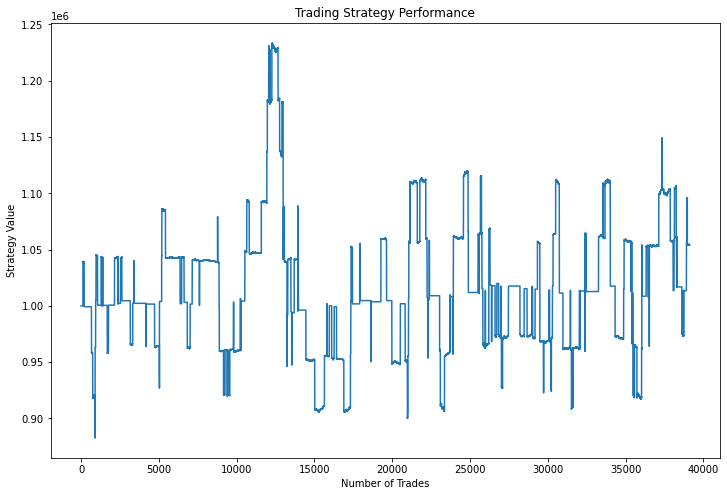

In [6]:
strategy.plot_results(best = True)

### <font color='navy'>  Best optimized strategy | Final value <font color='black'> 

In [7]:
strategy.strategy_value[-1]

1054010.5038149867

### <font color='navy'>  Run and backtest best strategy | Test data <font color='black'> 

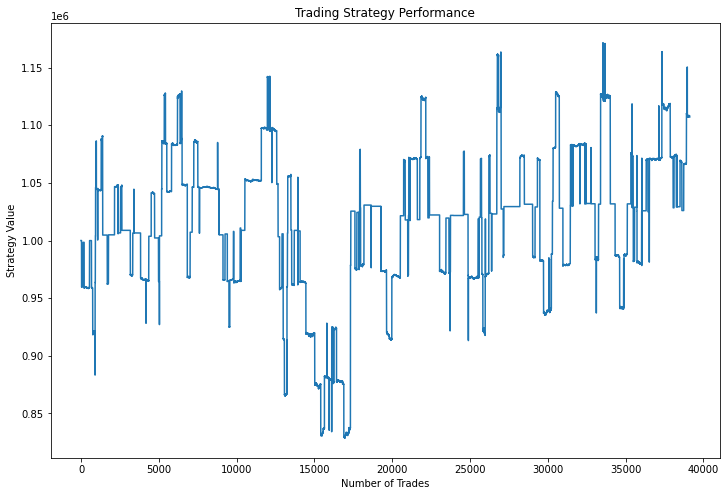

In [9]:
strategy.test()

### <font color='navy'>  Test final value <font color='black'>

In [10]:
strategy.strategy_value[-1]

1107153.0500953256

In the first chart, "Best model without optimization on test," we see the strategy's value over a series of trades without any parameter tuning. The performance appears relatively stable, hovering around the initial strategy value, with no significant growth over the number of trades executed. This suggests that while the strategy may be consistent, it lacks the efficacy to generate substantial returns as is.

Contrastingly, the second chart, "Strategy backtest with optimized parameters," displays the strategy's performance after optimization. There is a noticeable difference in the strategy value, which shows greater variability and peaks that exceed the initial value by a more significant margin. This implies that the optimization process has potentially enhanced the strategy's ability to capitalize on profitable opportunities in the market.

The comparison between the two suggests that optimization can have a marked impact on a trading strategy's success, enhancing its ability to generate returns. However, the increased variability also hints at potentially higher risk, which underscores the importance of risk management in trading strategy development. The results also serve as a reminder that past performance is not indicative of future results, and even an optimized strategy should be approached with caution and monitored closely.

## Pasive Strategy
Passive investing is an investment strategy to maximize returns by minimizing buying and selling.

The passive asset return from the first close to the last close is: 18.54%
The strategy return from the first close to the last close is: 10.72%


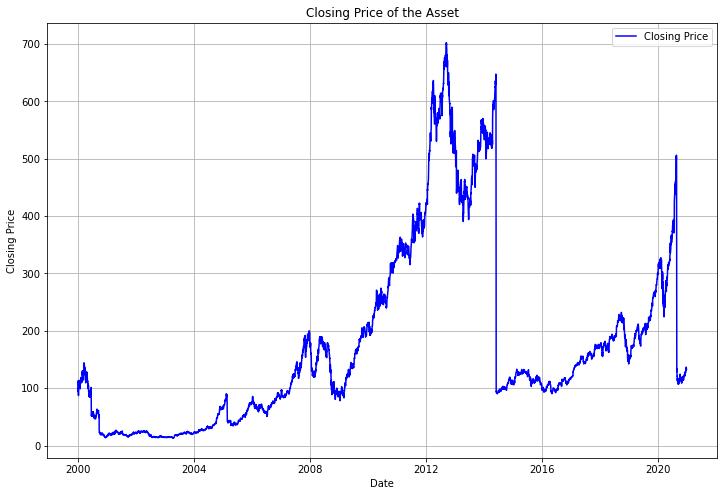

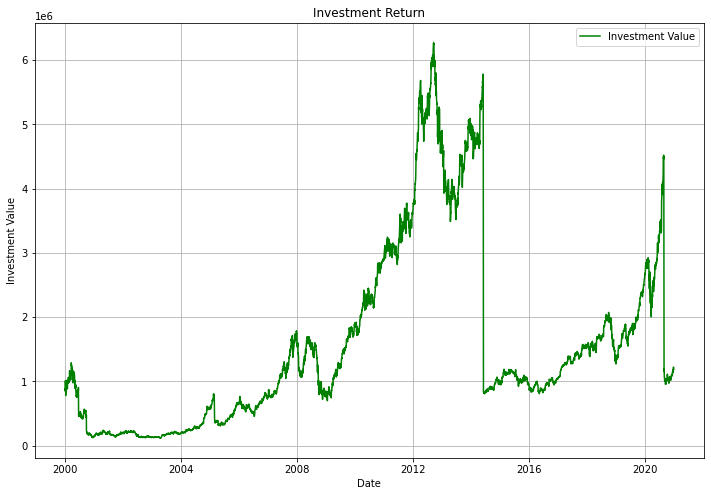

The final value of the passive investment: $1,185,443.41


In [32]:
# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Get the closing price of the first and last data
first_close = data.iloc[0]['Close']
last_close = data.iloc[-1]['Close']

# Calculate the passive asset return
passive_return = (last_close - first_close) / first_close

print("The passive asset return from the first close to the last close is: {:.2%}".format(passive_return))

# Comparison with the strategy used
cash = 1000000
cash_final = 1107153.05
strategy_return = (cash_final - cash) / cash
print("The strategy return from the first close to the last close is: {:.2%}".format(strategy_return))

# Sort the data by date if they are not sorted
data = data.sort_values(by='Date')
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Closing Price of the Asset')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the cumulative return
data['Returns'] = data['Close'].pct_change().fillna(0)

# Calculate the cumulative value
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Investment_Value'], label='Investment Value', color='green')
plt.title('Investment Return')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

final_value = data['Investment_Value'].iloc[-1]
print("The final value of the passive investment: ${:,.2f}".format(final_value))


The passive asset, represented by the underlying security, demonstrated a substantial return of 18.54% from the initial to the final closing prices, indicating favorable market conditions over the observed period. On the other hand, the implemented strategy yielded a lower return of 10.72%, suggesting that while it still produced positive results, it underperformed compared to simply holding the asset passively. This observation prompts a critical examination of the strategy's effectiveness and highlights the importance of continuously evaluating and adjusting investment strategies to optimize returns in evolving market environments.